<a href="https://colab.research.google.com/github/cam2149/MachineLearningII/blob/main/Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Matriz de confusión con scikitlearn

Consideremos el siguiente ejemplo tomado del texto   [Introduction to Machine Learning with Python](https://www.oreilly.com/library/view/introduction-to-machine/9781449369880/) by Andreas C. Müller & Sarah Guido

<Figure size 640x480 with 0 Axes>

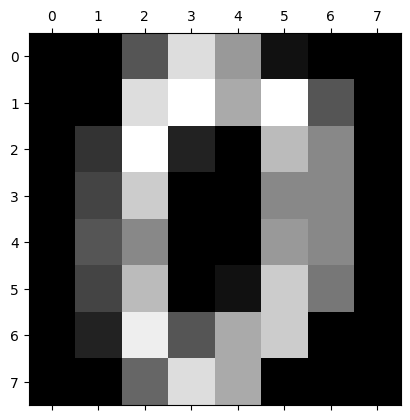

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score, roc_curve


import matplotlib.pyplot as plt
import numpy as np

digits = load_digits() #https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits


plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [ ]:
y = (digits.target == 1).astype(int)  # Set target to 1 if the digit is 9, otherwise 0
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0) #

In [ ]:
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train) #
pred_most_frequent = dummy_majority.predict(X_test)
print("predicted labels: %s" % np.unique(pred_most_frequent))
print("score: %f" % dummy_majority.score(X_test, y_test))

dummy = DummyClassifier().fit(X_train, y_train) #
pred_dummy = dummy.predict(X_test)
print("dummy score: %f" % dummy.score(X_test, y_test))

logreg = LogisticRegression(C=0.001).fit(X_train, y_train)  #
pred_logreg = logreg.predict(X_test)
print("logreg score: %f" % logreg.score(X_test, y_test))

k = 3
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)

print("KNN score: %f" % knn.score(X_test, y_test))

predicted labels: [0]
score: 0.904444
dummy score: 0.904444
logreg score: 0.986667
KNN score: 0.997778


In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print(confusion)

[[407   0]
 [  6  37]]


In [ ]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))
print("\nKNN")
print(confusion_matrix(y_test, pred_knn))

Most frequent class:
[[407   0]
 [ 43   0]]

Dummy model:
[[407   0]
 [ 43   0]]

Logistic Regression
[[407   0]
 [  6  37]]

KNN
[[407   0]
 [  1  42]]


In [ ]:
from sklearn.metrics import f1_score
print("f1 score most frequent: %.2f" % f1_score(y_test, pred_most_frequent))
print("f1 score dummy: %.2f" % f1_score(y_test, pred_dummy))
print("f1 score logreg: %.2f" % f1_score(y_test, pred_logreg))
print("f1 score KNN: %.2f" % f1_score(y_test, pred_knn))

f1 score most frequent: 0.00
f1 score dummy: 0.00
f1 score logreg: 0.93
f1 score KNN: 0.99


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_most_frequent,
 target_names=["not nine", "nine"],zero_division=0))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.95       407
        nine       0.00      0.00      0.00        43

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.82      0.90      0.86       450



In [ ]:
print(classification_report(y_test, pred_dummy,
 target_names=["not nine", "nine"],zero_division=0))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.95       407
        nine       0.00      0.00      0.00        43

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.82      0.90      0.86       450



In [ ]:
print(classification_report(y_test, pred_logreg,
 target_names=["not nine", "nine"],zero_division=0))

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       407
        nine       1.00      0.86      0.93        43

    accuracy                           0.99       450
   macro avg       0.99      0.93      0.96       450
weighted avg       0.99      0.99      0.99       450



In [ ]:
print(classification_report(y_test, pred_knn,
 target_names=["not nine", "nine"],zero_division=0))

              precision    recall  f1-score   support

    not nine       1.00      1.00      1.00       407
        nine       1.00      0.98      0.99        43

    accuracy                           1.00       450
   macro avg       1.00      0.99      0.99       450
weighted avg       1.00      1.00      1.00       450



# Metricas Probabilísticas

In [ ]:
# Predict probabilities
probs = logreg.predict_proba(X_test)

In [ ]:
# Compute log-likelihood
log_likelihood = np.sum(np.log(probs[np.arange(len(y_test)), y_test]))
print(f'Log-Likelihood: {log_likelihood}')

Log-Likelihood: -34.85994010514037


In [ ]:
# Number of parameters (coefficients + intercept)
k = X_test.shape[1] + 1  # 2 coefficients + 1 intercept

# Compute AIC
aic = 2 * k - 2 * log_likelihood
print(f'AIC: {aic}')

AIC: 199.71988021028073


In [ ]:
# Number of samples
n = X_test.shape[0]

# Compute BIC
bic = k * np.log(n) - 2 * log_likelihood
print(f'BIC: {bic}')

BIC: 466.82097308996447


In [ ]:
#  Predict probabilities for the positive class (y=1) on the test set
probs = logreg.predict_proba(X_test)[:, 1]  # Get the probability of the positive class (digit 9)

# Compute ROC AUC
roc_auc = roc_auc_score(y_test, probs)

# Output the ROC AUC score
print(f'ROC AUC: {roc_auc}')

ROC AUC: 0.9934860865093423


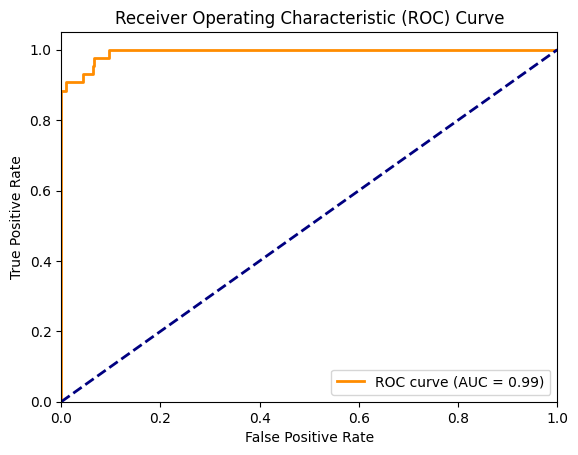

In [ ]:
# Compute ROC curve values (fpr, tpr, thresholds)
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random guess
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()